<a href="https://colab.research.google.com/github/nramelia2/DATA-SCIENTIST/blob/main/4%20CORRELATION%20MATRIX%20WITH%20HEATMAP/Correlation_Matrix_with_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unvariate Selection

In [ ]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Loading Data
data = pd.read_csv("data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Select the required data
x = data.iloc[:,2:13]  #independent colums
y = data.iloc[:,1]    # target colum i.e price 
y = y.astype('int')

In [ ]:
# Apply SelectKBest to perform extraction
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
# Combine 2 data
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  # print 10 best features

            Specs         Score
3        sqft_lot  1.397616e+08
9   sqft_basement  1.499046e+06
2     sqft_living  1.413666e+06
8      sqft_above  1.186570e+06
6            view  5.970107e+03
5      waterfront  2.123554e+03
10       yr_built  8.382794e+02
1       bathrooms  7.549797e+02
0        bedrooms  5.010881e+02
4          floors  3.838357e+02


# Feature Importance

In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
# Loading Data
data = pd.read_csv("data.csv")

In [ ]:
# Select the required data
x = data.iloc[:,2:13]  #independent colums
y = data.iloc[:,1]    # target colum i.e price 
y = y.astype('int')

In [ ]:
# Perform ExtraTreesClassifier to extract features
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.05382373 0.08127867 0.16835065 0.19791606 0.02571447 0.00145579
 0.01581734 0.04282437 0.16726269 0.07152143 0.1740348 ]


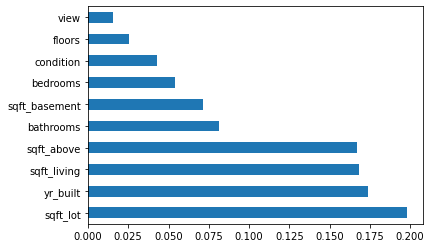

In [ ]:
# Plotting of feature importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Correlation Matrix with Heatmap

In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Loading Data
data = pd.read_csv("data.csv")

In [ ]:
# Select the required data
x = data.iloc[:,2:13]  #independent colums
y = data.iloc[:,1]    # target colum i.e price 
y = y.astype('int')

In [ ]:
# get the correlations of each feature in the dataset
corrmat = data.corr()
top_corr_features = corrmat.index

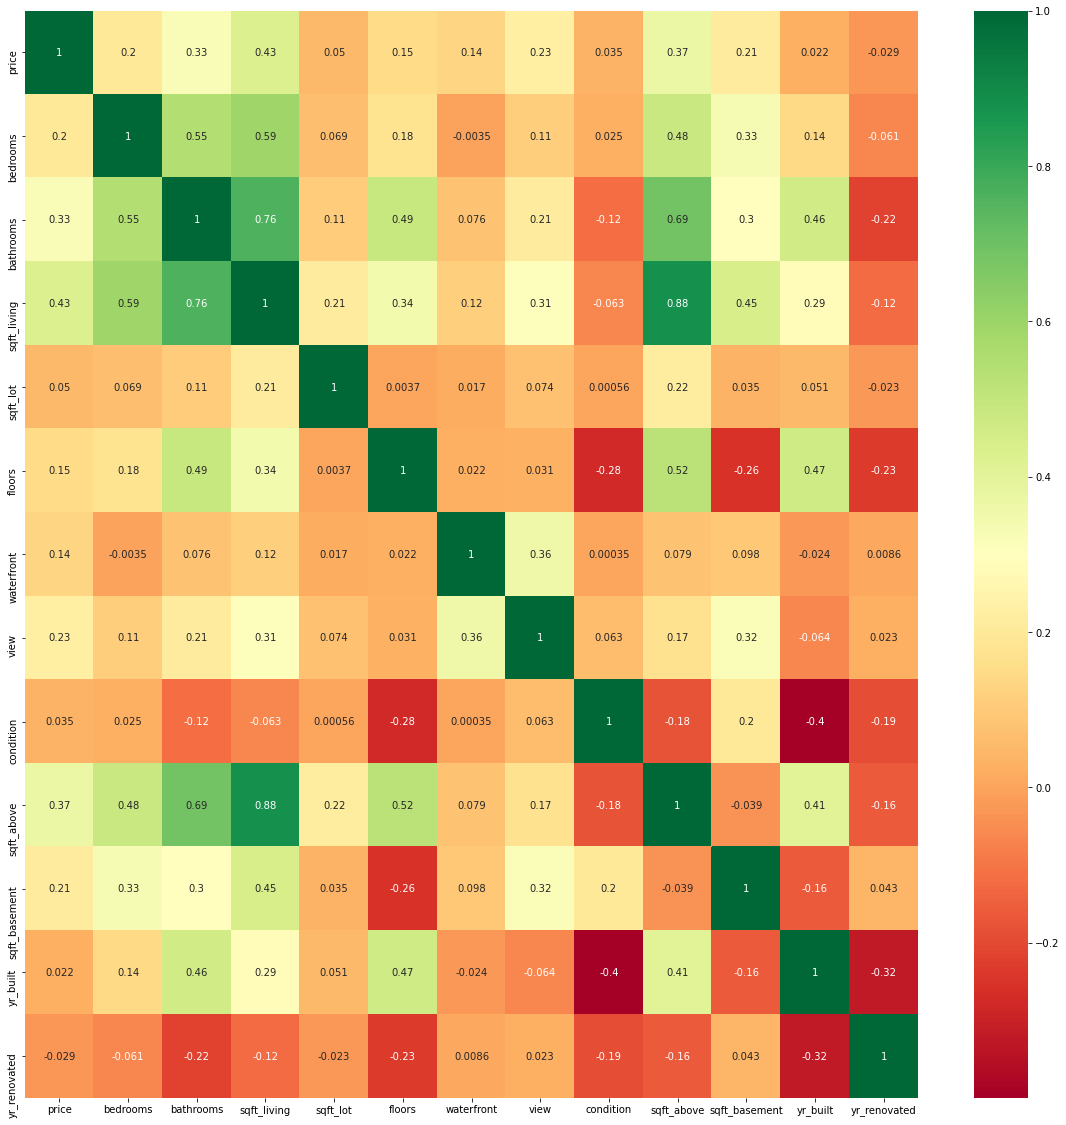

In [ ]:
# plot heatmap 
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")